# Dielectric waveguides


In [3]:
#!pip install mathjax
import sympy as sp

from IPython.display import display, HTML

import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as sciconst

from ipywidgets import interactive
from numpy.lib import scimath as sm
from scipy.signal import find_peaks

import dielectric_waveguide_scripts.quiz_script as quiz_script

Let's try to solve for the optical modes within a dielectric waveguide, defined by a spatially dependent permittivity $\varepsilon(\mathbf{r})$. 

### Problem Statement: 
Solve for the electromagnetic modes in a length $L_z$ of a waveguide that has width $w$, height $h$, and length $L_z$. 

***
### Approach: 
We need to solve Maxwell's equations in this volume for 
the electric field $\mathbf{E}$. We consider the problem in a volume of dimenions $L_x\gg w$, $L_y\gg h$, and length $L_z$. We assume vanishing fields on the transverse boundaries and periodic boundary conditions in $z$. 

In an arbitrary medium, the equations are modified to take into account the material properties of the medium, through the use of the electric permittivity $\varepsilon(\mathbf{r})$ and the magnetic permeability $\mu(\mathbf{r})$:



$$ \begin{aligned}\label{eq:MW}
\nabla\cdot\mathbf{D} &= \rho \\
\nabla\cdot\mathbf{B} &= 0 \\
\nabla\times\mathbf{E} &= -\frac{\partial\mathbf{B}}{\partial t} \\ \nabla\times\mathbf{H} &= \mathbf{J}+\frac{\partial\mathbf{D}}{\partial t}
\end{aligned} $$

\eqref{eq:MW}


where $\mathbf{D}=\varepsilon\mathbf{E}$ and $\mathbf{H}=\frac{\mathbf{B}}{\mu}$, $\mathbf{B}$ is the magnetic field, $\rho$ is the electric charge density, $\mathbf{J}$ is the electric current density, $\varepsilon_0$ is the permittivity of free space, and $\mu_0$ is the permeability of free space.

***
### Assumptions: $$\label{eq:assumptions}$$
Start with the following simplifying assumptions on the materials:

* Isotropic: The material properties (such as permittivity and permeability) are independent of the direction of the electric field or magnetic field, i.e.:
$$ \begin{aligned} \varepsilon(\mathbf{r},\mathbf{E}) &= \varepsilon(\mathbf{r},\mathbf{k}\cdot\mathbf{E}) \\ \mu(\mathbf{r},\mathbf{B}) &= \mu(\mathbf{r},\mathbf{k}\cdot\mathbf{B}), \end{aligned} $$ where $\mathbf{k}$ is any unit vector.

* Linear: The material properties (such as permittivity and permeability) are proportional to the strength of the electric field or magnetic field, so that for two solutions indexed by 1 and 2,
$$ \begin{aligned} \mathbf{D}(\mathbf{E}_1+\mathbf{E}_2) &= \mathbf{D}(\mathbf{E}_1)+\mathbf{D}(\mathbf{E}_2) \\ \mathbf{B}(\mathbf{H}_1+\mathbf{H}_2) &= \mathbf{B}(\mathbf{H}_1)+\mathbf{B}(\mathbf{H}_2). \end{aligned} $$

* Nondispersive: The material properties (such as permittivity and permeability) are independent of frequency, i.e.:
$$ \begin{aligned} \varepsilon(\mathbf{r},\omega) &= \varepsilon(\mathbf{r}) \\ \mu(\mathbf{r},\omega) &= \mu(\mathbf{r}) \end{aligned} $$

* Nonmagnetic: The material has a magnetic permeability of $\mu=\mu_0$, which is the permeability of free space. This means that the material is not magnetically active and does not produce its own magnetic field.

* No free moving charges: $\mathbf{J}=0$. 

***



$$ \begin{aligned} \nabla\times \mathbf{E(r)}&=-j\omega\mu_0 \mathbf{H(r)} \ \nabla\times \mathbf{H(r)}&=j\omega\varepsilon(r) \mathbf{E(r)} \ \nabla\cdot(\varepsilon(\mathbf{r})\mathbf{E(r)})&=0 \ \nabla\cdot \mathbf{H(r)}&=0, \end{aligned} $$


If it's time-invarient we can moreover approach the problem by decomposing any optical field into a superposition of Fourier components -- i.e., of monochromatic fields. Let's consider one such field at frequency $\omega$. 
harmonic time dependence $e^{j\omega t}$
absence of sources and currents
We have also defined:

$$ \begin{aligned} \mathbf{D}&=\varepsilon\mathbf{E}=\varepsilon_0n^2\mathbf{E} \ \mathbf{B}&=\mu_0\mathbf{H}. \end{aligned} $$

The boundary conditions for an interface between two dielectrics with $\varepsilon_1$ and $\varepsilon_2$ (where $\mathbf{n_v}$ represents the normal vector) are given by:

$$ \begin{aligned} \mathbf{n_v}\times(\mathbf{E}_1-\mathbf{E}_2)&=0 \ \mathbf{n_v}\times(\mathbf{H}_1-\mathbf{H}_2)&=0 \ \mathbf{n_v}\cdot(\varepsilon_1\mathbf{E}_1-\varepsilon_2\mathbf{E}_2)&=0 \ \mathbf{n_v}\cdot(\mathbf{H}_1-\mathbf{H}_2)&=0. \end{aligned} $$

To continue, we can consider the special case of a dielectric waveguide, where the electric field is confined to a narrow region in space, known as the waveguide core. The surrounding region, known as the cladding, has a lower refractive index than the core. The boundary conditions for the waveguide then become:

$$ \begin{aligned} \mathbf{n_v}\times(\mathbf{E}_\text{core}-\mathbf{E}_\text{cladding})&=0 \\ \mathbf{n_v}\times(\mathbf{H}_\text{core}-\mathbf{H}_\text{cladding})&=0 \\ \mathbf{n_v}\cdot(\varepsilon_\text{core}\mathbf{E}_\text{core}-\varepsilon_\text{cladding}\mathbf{E}_\text{cladding})&=0 \\ \mathbf{n_v}\cdot(\mathbf{H}_\text{core}-\mathbf{H}_\text{cladding})&=0. \end{aligned} $$

These boundary conditions allow us to find the allowed modes of the waveguide, which are the solutions to the wave equation that satisfy the boundary conditions. These modes determine the properties of the waveguide, such as its guiding properties and the attenuation of the guided waves.

### 1.1. Longitudinally invariant waveguides
Let's apply now the periodic boundary condition. Then, an eigenmode propagating in the positive $z$ direction can be represented by $\mathbf{E(r)}=\mathbf{E_0}(x,y)e^{-j\beta z}$ and $\mathbf{H(r)}=\mathbf{H_0}(x,y)e^{-j\beta z}$, where $\beta$ is the propagation constant of the eigenmode. The effective mode index is defined as $\text{n}_\text{eff}=\beta/k_0$, which is related to the effective dielectric constant $\varepsilon_{\text{eff}}=\text{n}_\text{eff}^2$. The values of $\text{n}_\text{eff}$ are bounded by the minimum and maximum refractive indices of the waveguide material. All electromagnetic field distributions within the waveguide geometry can be described by a combination of these eigenmodes.

### 1.2. The 3-layer slab waveguide
Eigenmodes in common rectangular waveguides can be approximated by analytically solving for modes in structures that are invariant along both the propagation direction and one of the perpendicular directions. These structures are called slab waveguides. The electric and magnetic fields of the eigenmodes in a slab waveguide can be represented by $\mathbf{E(r)}=\mathbf{E_0}(x)e^{-j\beta z}$ and $\mathbf{H(r)}=\mathbf{H_0}(x)e^{-j\beta z}$, respectively. Substituting these equations into Maxwell's curl equations leads to a system of six equations. This system can be split into two sets of three equations, defining transverse electric (TE) modes, in which there is no electric field in the propagation direction, and transverse magnetic (TM) modes, in which there is no magnetic field in the propagation direction. These modes can be described by the Helmholtz equation. Assuming piecewise constant refractive index allows the decoupling of the three components of the field vectors, leading to an eigenvalue equation. The general solution to this equation is a plane wave with wavevector $k_x=\sqrt{k_0^2\text{n}_\text{i}^2-\beta^2}$, where $\text{n}_\text{i}$ is the refractive index of the waveguide material.

<details>
    <summary><b>Click to expand for detail</b></summary>
The electric and magnetic fields of the eigenmodes in a slab waveguide can be represented by $\mathbf{E(r)}=\mathbf{E_0}(x)e^{-j\beta z}$ and $\mathbf{H(r)}=\mathbf{H_0}(x)e^{-j\beta z}$, respectively. Substituting these equations into Maxwell's curl equations leads to a system of six equations that can be split into two sets, defining transverse electric (TE) modes and transverse magnetic (TM) modes. These modes can be described by the Helmholtz equation:

$$
\begin{align*}
& \frac{d^2E_0(x)}{dx^2}+k_0^2\text{n}\text{i}^2E_0(x)=\beta^2E_0(x) \
&\frac{d^2H_0(x)}{dx^2}+k_0^2\text{n}\text{i}^2H_0(x)=\beta^2H_0(x).
\end{align*}
$$

This is an eigenvalue equation, with general solution

$$
E_0(x)=A_ie^{jk_x(x-a_i)}+B_ie^{-jk_x(x-a_i)},
$$

where
$$
k_x=\sqrt{k_0^2\text{n}_\text{i}^2-\beta^2},
$$

and $a_i$ defines the position on the x-axis of the wave, which we set to the top interface (with the exception of the topmost film, in which $a_N=a_{N-1}$). This solution represents a plane wave, with wavevector $k_x$.

It is worth noting that although slab waveguides are not commonly used in photonic devices, they are often employed in simulation software, as they provide valuable insight into waveguide modes and can be solved analytically. Additionally, we should mention that while we have assumed piecewise constant refractive index, this assumption can be relaxed to allow for more general waveguides with smoothly varying refractive index. However, solving for the eigenmodes in these cases usually requires numerical methods.
</details>

### Problem 0: 

In [ ]:
q = quiz_script.Quiz()
q.run_quiz()
q.check_quiz_answers()

### Problem 1: TM modes in a slab waveguide 

Note: This problem is built on an earlier homework exercise by Dr Carlos Errando Herranz.

The following code solves for the fields in a slab waveguide for TE and TM modes, given the refractive indexes of the core and claddings, the wavelength,  the slab thickness $h$, width $w$, and a pulse length of $L_z= c/n_{\text{eff}} * 1/\Omega $ where $\Omega$ is the pulse bandwidth. 

You can double-check your solutions (propagation constants, effective mode indices, and shape of the E and H fields) are correct using the online solver https://www.computational-photonics.eu/oms.html. Note that the field normalization in this online solver might be different than yours.

Number of modes = 2


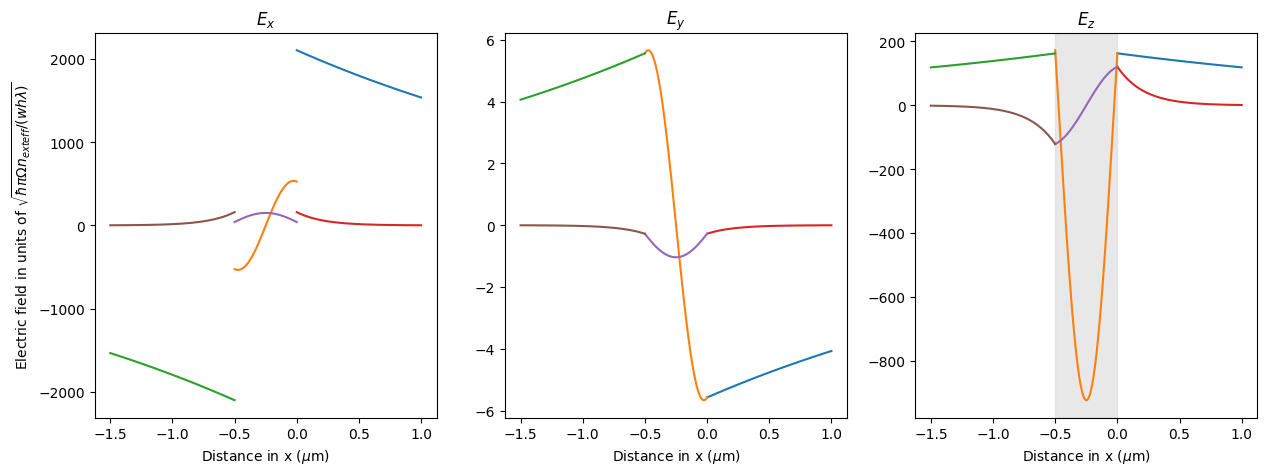

Neffs = [1.003003   1.53353353]


array([1.003003  , 1.53353353])

In [16]:
plottest = False # This lets you plot the graph showing the numerical solutions to the transcendental equations

def slab(nc, ncladtop, ncladbot, wavel, d, pol='TM', plot=True, printit=True): 
    # Wavelength and thickness inputs are in um
    wavel=wavel*1e-6
    d=d*1e-6
    k0=2*np.pi/wavel
    omega=k0*sciconst.c
    beta=np.linspace(min(nc,ncladtop,ncladbot),max(nc,ncladtop,ncladbot),num=1000)*2*np.pi/wavel
    
    delta=sm.sqrt(beta**2-ncladbot**2*k0**2)
    kappa=sm.sqrt(nc**2*k0**2-beta**2)
    gamma=sm.sqrt(beta**2-ncladtop**2*k0**2)
    
    # Numerically solve for the transcendental equation
    left=np.tan(kappa*d)
    if pol=='TE':
        right=kappa*(gamma+delta)/(kappa**2-gamma*delta)
    elif pol=='TM':
        right=kappa*(gamma*nc**2/ncladtop**2+delta*nc**2/ncladbot**2)/(kappa**2-gamma*nc**2/ncladtop**2*delta*nc**2/ncladbot**2)
    fun=-abs(left-right)
    peaks=find_peaks(fun)
    
    # This lets you plot the transcendental equation
    if plottest==True:
        plt.figure(1)
        plt.plot(beta*wavel/np.pi/2,left, beta*wavel/np.pi/2, right)
        plt.ylim(-10, 10)
        plt.xlabel('Effective index')
        plt.figure(2)
        plt.plot(beta*wavel/np.pi/2,fun)
        plt.xlabel('Effective index')
        plt.ylim(-1, 0)
    
    # Calculate betaeff and neff
    betas=beta[peaks[0][:]]
    neffs=beta[peaks[0][:]]*wavel/2/np.pi
    
    # Number of modes
    M=len(neffs)
    if printit:
        print('Number of modes = '+ str(M))
    
    # Calculate and plot electric field
    if plot==True:
        x1=np.linspace(0,2*d,num=100)
        x2=np.linspace(-d,0,num=100)
        x3=np.linspace(-3*d,-d,num=100)
        B=1
        fig, axs = plt.subplots(1,3,figsize=(15,15/3))
        for b in betas:
            deltab=np.sqrt(b**2-ncladbot**2*k0**2)
            kappab=np.sqrt(nc**2*k0**2-b**2)
            gammab=np.sqrt(b**2-ncladtop**2*k0**2)
            if pol=='TE':
                A=-B*kappab/deltab
            elif pol=='TM':
                A=-B*kappab*ncladbot**2/nc**2/deltab
            ey1=A*np.exp(-deltab*x1)
            ey2=A*np.cos(kappab*x2)+B*np.sin(kappab*x2)
            ey3=(A*np.cos(kappab*d)-B*np.sin(kappab*d))*np.exp(gammab*(x3+d))
            hx1=-b*ey1/omega/sciconst.mu_0
            hx2=-b*ey2/omega/sciconst.mu_0
            hx3=-b*ey3/omega/sciconst.mu_0
            hz1=-(-1/1j/omega/sciconst.mu_0)*deltab*A*np.exp(-deltab*x1)
            hz2=(-1/1j/omega/sciconst.mu_0)*(-A*kappab*np.sin(kappab*x2)+B*kappab*np.cos(kappab*x2))
            hz3=(-1/1j/omega/sciconst.mu_0)*gammab*(A*np.cos(kappab*d)-B*np.sin(kappab*d))*np.exp(gammab*(x3+d))
            if pol=='TE':
                axs[0].plot(x1*1e6, ey1, x2*1e6, ey2, x3*1e6, ey3)
                axs[0].set_title('$E_y$')
                axs[1].plot(x1*1e6, hx1, x2*1e6, hx2, x3*1e6, hx3)
                axs[1].set_title("Hx")
                axs[2].plot(x1*1e6, np.real(1j*hz1), x2*1e6, np.real(1j*hz2), x3*1e6, np.real(1j*hz3)) #shifted by pi
                axs[2].set_title("Hz")
            elif pol=='TM':
                hy1=ey1
                hy2=ey2
                hy3=ey3
                ex1=-hy1*b/sciconst.epsilon_0/ncladbot**2/omega
                ex2=-hy2*b/sciconst.epsilon_0/nc**2/omega
                ex3=-hy3*b/sciconst.epsilon_0/ncladtop**2/omega
                ez1=-hz1*sciconst.mu_0/sciconst.epsilon_0/ncladbot**2
                ez2=-hz2*sciconst.mu_0/sciconst.epsilon_0/nc**2
                ez3=-hz3*sciconst.mu_0/sciconst.epsilon_0/ncladtop**2
                axs[0].plot(x1*1e6, ex1, x2*1e6, ex2, x3*1e6, ex3)
                axs[0].set_title('$E_x$')
                axs[1].plot(x1*1e6, hy1, x2*1e6, hy2, x3*1e6, hy3)
                axs[1].set_title('$E_y$')
                axs[2].plot(x1*1e6, np.real(1j*ez1), x2*1e6, np.real(1j*ez2), x3*1e6, np.real(1j*ez3)) #shifted by pi
                axs[2].set_title('$E_z$')

        axs[0].set(ylabel='Electric field in units of $\sqrt{\hbar \pi  \Omega n_{\text{eff}}/(w h \lambda) }$')
        for ax in axs.flat:
            ax.set(xlabel='Distance in x ($\mu$m)')

                # Add box from x=-d to x=d
        plt.axvspan(-d*1e6, 0, alpha=0.5, color='lightgrey')
        plt.show()
    if printit:
        print('Neffs = '+ str(neffs))
    return neffs

slab(2,1,1,1.55,0.5, pol='TM', plot=True)

#### Option 1: Non-interactive plotting

Number of modes = 3


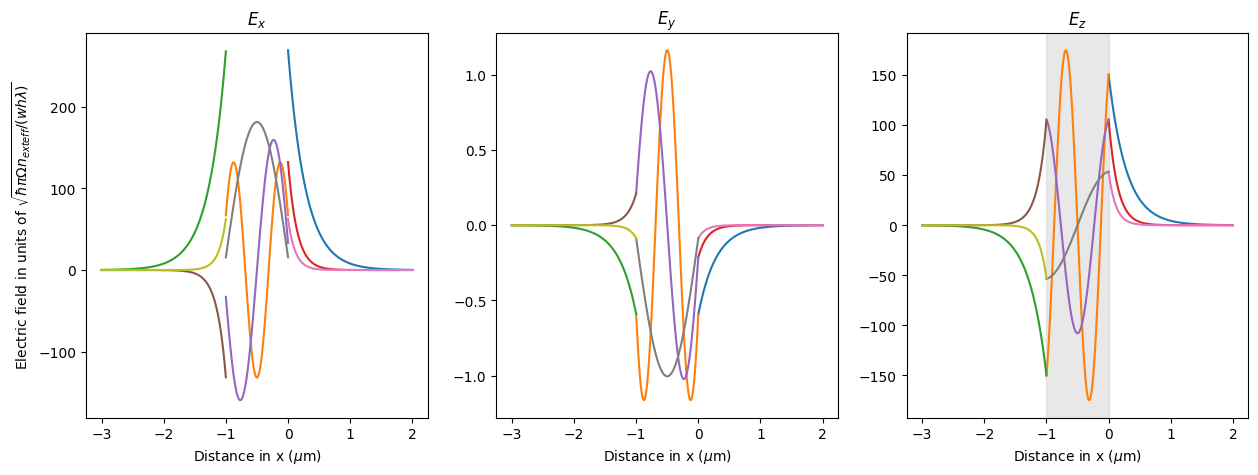

Neffs = [1.20520521 1.65665666 1.91791792]


In [14]:
this_nc = 2.00          # EDIT ME: any core index value between 1.00 and 4.00
this_ncladtop = 1.00    # EDIT ME: any top cladding index value between 1.00 and 2.00
this_ncladbot = 1.00    # EDIT ME: any bottom cladding index value between 1.00 and 2.00
this_wlen = 1.20        # EDIT ME: any wavelength value between 0.600 um to 2.00 um 
this_d = 1.00           # EDIT ME: any slab height value between 0.00 um to 2.00 um
this_pol = 'TM'         # EDIT ME: polarisation either 'TM' or 'TE'

this_neffs = slab(this_nc, this_ncladtop, this_ncladbot, this_wlen, this_d, this_pol, plot=True)

#### Option 2: Interactive plotting (will be slow in Binder)

In [15]:
interactive(slab, nc=(1,4,0.1), ncladtop=(1,2,0.1), ncladbot=(1,2,0.1), wavel=(0.6,2,0.2), d=(0,2,0.1))

interactive(children=(FloatSlider(value=2.0, description='nc', max=4.0, min=1.0), FloatSlider(value=1.0, descr…

Examples: 
* Spectrally separable photon-pair generation in dispersion engineered thin-film lithium niobate 
 [link text](https://opg.optica.org/view_article.cfm?gotourl=%2FDirectPDFAccess%2F107CE2E4%2D774F%2D4BE4%2D823C40AE3AD25D23%5F473228%2Fol%2D47%2D11%2D2830%2Epdf%3Fda%3D1%26id%3D473228%26seq%3D0%26mobile%3Dno&org=Massachusetts%20Institute%20of%20Technology%20Libraries)



### Problem 2: Designing a single mode waveguide

Using the code above, design your waveguide for single mode operation by:
1. Choosing a material platform: (real) refractive index of waveguide core and claddings (e.g. use https://refractiveindex.info/)
2. Plot the effective indexes of all your calculated modes vs. slab height. Make sure you have a sufficiently large slab height range (from near-zero to microns should suffice). Use this plot to choose a slab height for which your waveguide is single mode (i.e. only a TE and a TM modes)
3. Using your single mode slab height, investigate the effective indexes of your modes vs. wavelength. What is the shortest wavelength at which your waveguide can operate before running into multi-mode operation?

## References
[1] Saleh, B. E. A., and Teich, M. C., "Fundamentals of photonics", New York: Wiley (1991)

[2] Van Thourhout, D., Baets, R., Ottevaere, H., "Microphotonics", Universiteit Gent and Vrije Universiteit Brussel (2013)

[3] Errando-Herranz, C., "Photonic MEMS for optical information technologies", PhD Thesis, KTH Royal Institute of Technology (2018) urn:nbn:se:kth:diva-235069
